### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-11-25-bis-bis/triple/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241126$25^DAN_IHNY_SDS_PYS_0.03$triple.txt
20241126$25^DAN_IHNY_SDS_PYS_phos$triple.txt
20241126$25^DAN_IHNY_SDS_PYS_0.01$triple.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = pd.read_csv(root + file, 
                         sep="\t", 
                         header=None)

        # clean the df
        if "single" in file:
            print("\ncleaning SINGLE")
            print(file)
            df = plotting.clean_single(df)
        elif "triple" in root:
            print("\ncleaning TRIPLE")
            print(file)
            df = plotting.clean_triple(df)
        else:
            raise ValueError("Unknown type of experiment")
        
        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241126$25^DAN_IHNY_SDS_PYS_0.03$triple.txt

cleaning TRIPLE
20241126$25^DAN_IHNY_SDS_PYS_0.03$triple.txt
20241126$25^DAN_IHNY_SDS_PYS_phos$triple.txt

cleaning TRIPLE
20241126$25^DAN_IHNY_SDS_PYS_phos$triple.txt
20241126$25^DAN_IHNY_SDS_PYS_0.01$triple.txt

cleaning TRIPLE
20241126$25^DAN_IHNY_SDS_PYS_0.01$triple.txt


,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,Break Stress,TOTAL WORK,TOUGHNESS,Name
0,51.0,4690.0,81.5,95.8,62.3,3.841000e+09,60.78,2.95,0.012170,59.55,...,0.004201,27.84,3.9550,54.32,94.20,0.02009,197.015599,0.010940,77200000.0,DAN_IHNY_SDS_PYS_0.03
1,52.0,2476.2,59.5,72.2,43.7,4.240000e+09,35.23,2.63,0.012120,31.19,...,0.002219,25.77,1.5640,50.16,43.25,0.01747,171.322175,0.005009,66590000.0,DAN_IHNY_SDS_PYS_0.03
2,53.0,4928.7,82.4,98.7,63.6,3.583000e+09,59.74,3.12,0.012290,61.11,...,0.004299,23.33,4.2990,45.00,87.55,0.01776,174.166104,0.008698,58570000.0,DAN_IHNY_SDS_PYS_0.03
3,54.0,3175.0,64.0,70.4,57.5,4.073000e+09,43.32,3.12,0.012710,42.53,...,0.002994,25.44,3.0780,48.83,65.30,0.02057,201.722791,0.006877,71180000.0,DAN_IHNY_SDS_PYS_0.03
4,55.0,2942.6,64.8,75.7,49.5,4.083000e+09,40.75,1.96,0.009549,33.34,...,0.002481,16.43,0.9999,33.70,41.00,0.01393,136.606635,0.003461,39120000.0,DAN_IHNY_SDS_PYS_0.03


Statistical significance between DAN_IHNY_SDS_PYS_phos and DAN_IHNY_SDS_PYS_0.01: p = 0.0002


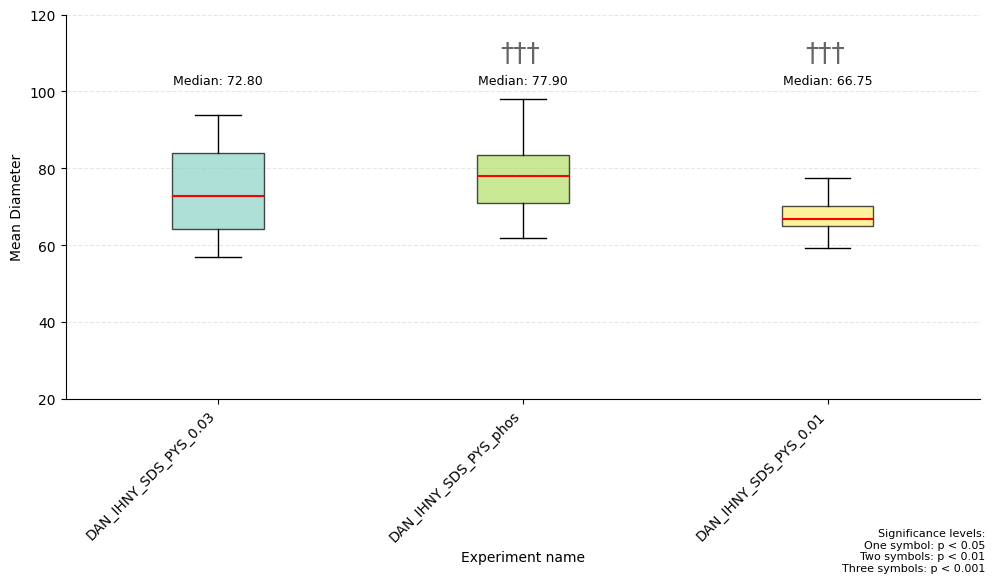

In [7]:
header = 'MEAN DIAMETER'
ymin = 20
ymax = 120
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

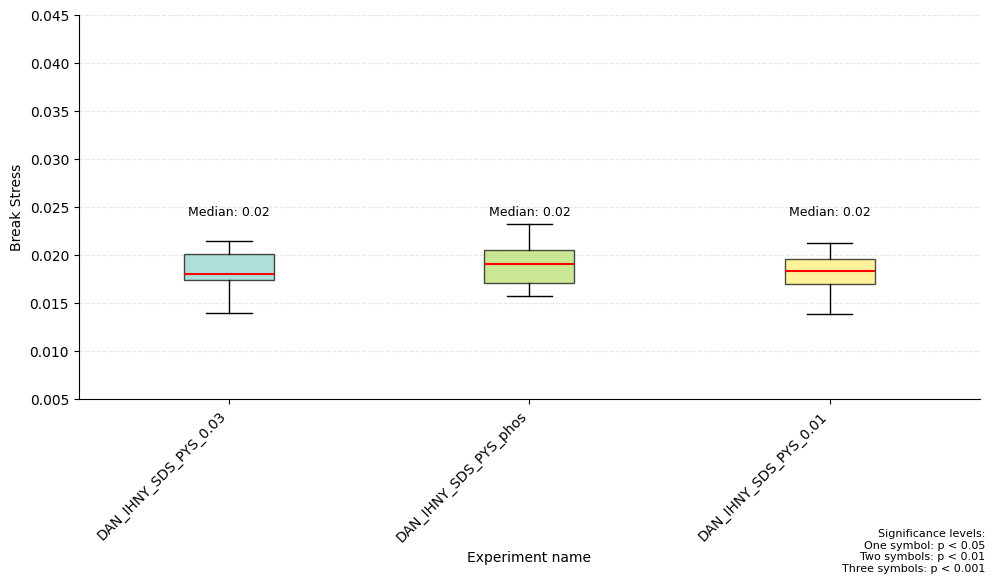

In [8]:
header = 'BREAK STRESS'
ymin = 0.005
ymax = 0.045
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

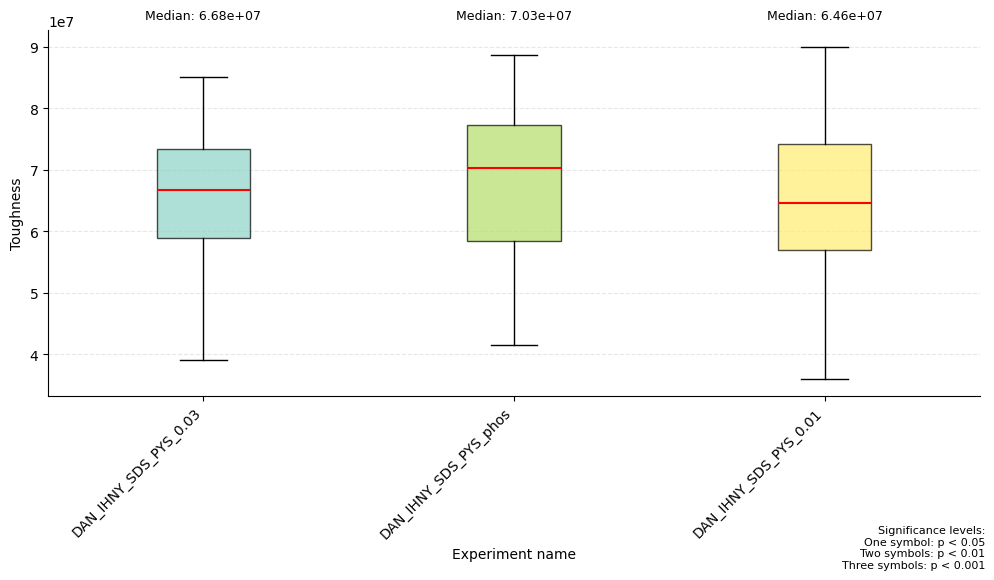

In [9]:
header = 'TOUGHNESS'
ymin = None
ymax = None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between DAN_IHNY_SDS_PYS_phos and DAN_IHNY_SDS_PYS_0.01: p = 0.0013


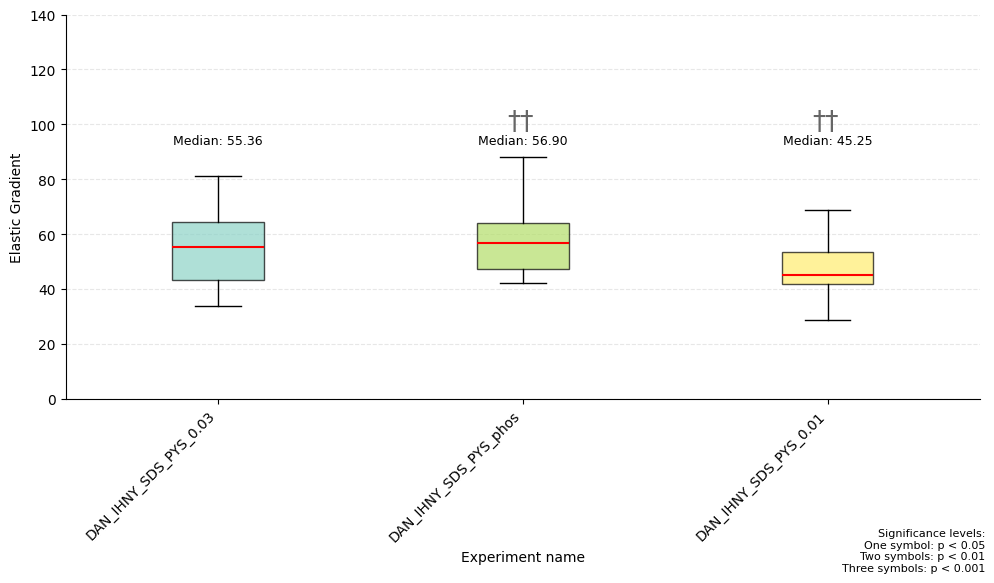

In [10]:
header = 'ELASTIC GRADIENT'
ymin = 0
ymax =  140
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between DAN_IHNY_SDS_PYS_0.03 and DAN_IHNY_SDS_PYS_phos: p = 0.0281
Statistical significance between DAN_IHNY_SDS_PYS_phos and DAN_IHNY_SDS_PYS_0.01: p = 0.0168


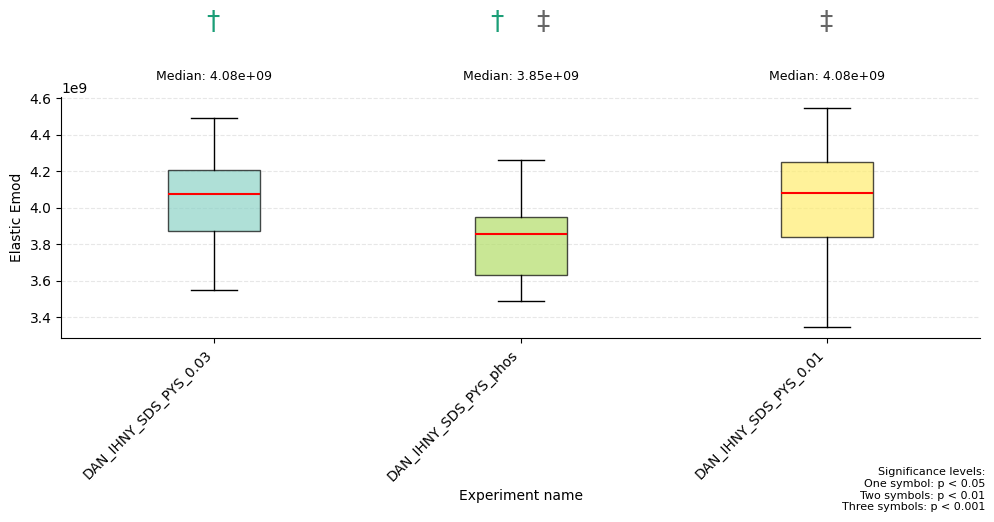

In [11]:
header = 'ELASTIC EMOD'
ymin = None
ymax =  None
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()